<a href="https://colab.research.google.com/github/Ervita5/Last-mile/blob/main/Ilustrasi_Masalah_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

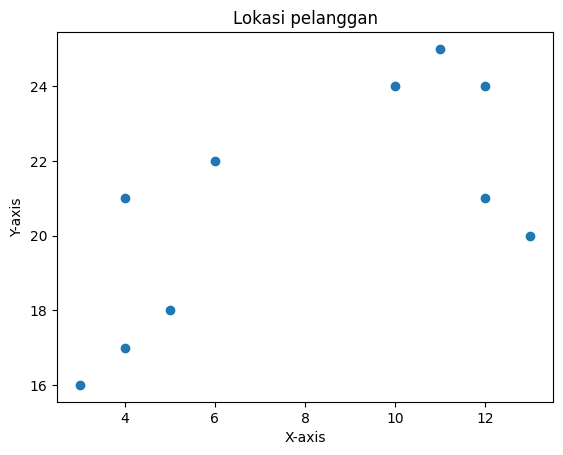

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data koordinat
data = np.array([[4, 21, 1], [5, 18, 1], [10, 24, 1], [4, 17, 1], [3, 16, 1], [11, 25, 1], [12, 24, 1], [6, 22, 1], [13, 20, 1], [12, 21, 1]])

# Pisahkan data menjadi x dan y
x = data[:, 0]
y = data[:, 1]

# Memisahkan data menjadi dua kategori
kategori_1 = data[data[:, 2] == 1]
kategori_2 = data[data[:, 2] == 2]

# Plot data
plt.scatter(kategori_1[:, 0], kategori_1[:, 1], label='Kategori 1')
plt.scatter(kategori_2[:, 0], kategori_2[:, 1], label='Kategori 2')

# Beri label pada sumbu x dan y
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.title('Lokasi pelanggan')
# Tampilkan plot
plt.show()


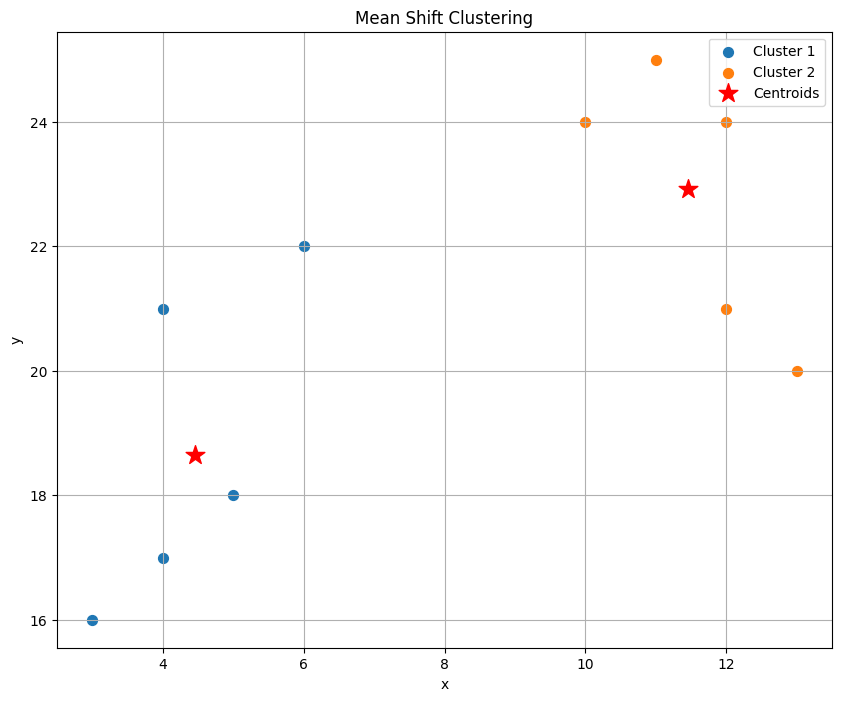

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data koordinat
data = np.array([[4, 21, 1], [5, 18, 1], [10, 24, 1], [4, 17, 1], [3, 16, 1], [11, 25, 1], [12, 24, 1], [6, 22, 1], [13, 20, 1], [12, 21, 1]])

# Menghitung jarak Euclidean antara dua titik
def euclidean_distance(coord1, coord2):
    return np.linalg.norm(coord1[:2] - coord2[:2])


def gaussian_kernel(distance, bandwidth):
    return np.exp(-0.5 * ((distance / bandwidth) ** 2))

def mean_shift(data, bandwidth=2, max_iterations=10):
    for _ in range(max_iterations):
        new_data = []

        for x in data:
            total_weight = 0.0
            weighted_sum = np.zeros_like(x, dtype=np.float64)

            for xi in data:
                distance = euclidean_distance(x, xi)
                weight = gaussian_kernel(distance, bandwidth)
                total_weight += weight
                weighted_sum += (weight * np.array(xi))

            if total_weight > 0:
                new_x = weighted_sum / total_weight
                new_data.append(new_x)

        if not new_data:
            break

        data = np.array(new_data)

    return data

# Menjalankan Mean Shift Clustering secara manual
result = mean_shift(data)

#menentukan centroid
def group_similar_points(data, threshold=0.001):
    grouped_data = {}
    for point in data:
        rounded_point = np.round(point[:2], decimals=3)  # Round only latitude and longitude
        if tuple(rounded_point) not in grouped_data:
            grouped_data[tuple(rounded_point)] = point

    return list(grouped_data.values())

simplified_modes = group_similar_points(result)

# Membuat fungsi untuk mengelompokkan data berdasarkan pusat cluster
# Fungsi untuk mengelompokkan data berdasarkan pusat kluster
def assign_to_clusters(data, centroids):
    clusters = [{'center': centroid, 'points': []} for centroid in centroids]

    for point in data:
        distances = [euclidean_distance(point, centroid['center']) for centroid in clusters]
        cluster_index = np.argmin(distances)
        clusters[cluster_index]['points'].append(point)

    return clusters

# Menjalankan Mean Shift Clustering secara manual
result = mean_shift(data)

# Menetapkan data ke dalam kelompok berdasarkan centroid
cluster_centers = np.array(simplified_modes)
result_clusters = assign_to_clusters(data, cluster_centers)

# Untuk visualisasi hasil clustering
# panjang = 10 dan lebar = 8
plt.figure(figsize=(10, 8))

# Untuk plotting klaster
for i, cluster in enumerate(result_clusters):
    cluster_data = np.array(cluster['points'])
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}', s=50)

# untuk scatter plot centroid
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], label='Centroids', s=200, c='red', marker='*')
# Untuk memberikan judul plot
plt.title('Mean Shift Clustering')
# Untuk label x
plt.xlabel('x')
# Untuk label y
plt.ylabel('y')

plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Memeriksa klaster dengan lebih dari 15 titik observasi dan memprint informasi mengenai cluster yang lebih dari 15 titik observasi
for i, cluster in enumerate(result_clusters):
    # memeriksa apakah klaster memiliki lebih dari 15 observasi
    if len(cluster['points']) > 15:
        # Menampilkan informasi mengenai klaster yang memiliki lebih dari 15 titik observasi
        print(f"kluster {i + 1} memiliki {len(cluster['points'])} titik observasi, lebih dari 15.")
    else:
      #Jika tidak ada titik yang melanggar, cetak informasi bahwa klaster tidak melanggar
        print(f"klaster {i + 1} tidak memiliki titik yang melanggar batasan jumlah anggota dalam klaster.")

# Memeriksa jarak titik dari centroid di setiap klaster
threshold_distance = 4  # ini adalah batasan jarak yang diberikan

for i, cluster in enumerate(result_clusters):
    # Mengambil nilai pusat dari cluster
    centroid = cluster['center'][:2]
    # Inisiasi list kosong
    points_to_move = []

    # Menghitung jarak dari pusat ke titik-titik observasi dalam klaster yang sama
    for point in cluster['points']:
        distance_to_centroid = euclidean_distance(point, centroid)
        # Memeriksa apakah ada jarak yang lebih dari 4 km
        if distance_to_centroid > threshold_distance:
            # Jika ada yang lebih dari 4 maka tambahkan ke list points_to_move
            points_to_move.append(point)

    # Menandakan apakah terdapat titik yang melanggar batasan
    if points_to_move:
        print(f"Klaster {i + 1} memiliki {len(points_to_move)} titik yang melanggar batasan jarak lebih dari {threshold_distance} km.")
    else:
        # Jika tidak ada titik yang melanggar, cetak informasi bahwa klaster tidak melanggar
        print(f"Klaster {i + 1} tidak memiliki titik yang melanggar batasan jarak.")


klaster 1 tidak memiliki titik yang melanggar batasan jumlah anggota dalam klaster.
klaster 2 tidak memiliki titik yang melanggar batasan jumlah anggota dalam klaster.
Klaster 1 tidak memiliki titik yang melanggar batasan jarak.
Klaster 2 tidak memiliki titik yang melanggar batasan jarak.


In [ ]:
# Menghitung jarak dari pusat kluster ke titik-titik observasi
for i, cluster in enumerate(result_clusters):
    center = cluster_centers[i][:2]  # Mengambil dua koordinat pertama dari pusat kluster
    points = np.array(cluster['points'])[:, :2]  # Mengambil kolom pertama dan kedua (X dan Y) dari setiap titik

    print(f"Jarak dari Pusat Kluster {i + 1} ke Titik-titik Observasi:")

    for point in points:
        distance = euclidean_distance(center, point)
        print(f"   Jarak dari {center} ke {point} adalah {distance:.2f} satuan")


Jarak dari Pusat Kluster 1 ke Titik-titik Observasi:
   Jarak dari [ 4.45826216 18.6521219 ] ke [ 4 21] adalah 2.39 satuan
   Jarak dari [ 4.45826216 18.6521219 ] ke [ 5 18] adalah 0.85 satuan
   Jarak dari [ 4.45826216 18.6521219 ] ke [ 4 17] adalah 1.71 satuan
   Jarak dari [ 4.45826216 18.6521219 ] ke [ 3 16] adalah 3.03 satuan
   Jarak dari [ 4.45826216 18.6521219 ] ke [ 6 22] adalah 3.69 satuan
Jarak dari Pusat Kluster 2 ke Titik-titik Observasi:
   Jarak dari [11.46275245 22.92155195] ke [10 24] adalah 1.82 satuan
   Jarak dari [11.46275245 22.92155195] ke [11 25] adalah 2.13 satuan
   Jarak dari [11.46275245 22.92155195] ke [12 24] adalah 1.20 satuan
   Jarak dari [11.46275245 22.92155195] ke [13 20] adalah 3.30 satuan
   Jarak dari [11.46275245 22.92155195] ke [12 21] adalah 2.00 satuan


In [ ]:
import numpy as np

# Koordinat titik
titik_1 = np.array([0, 25])
cluster_centers = np.array([(4.45826216, 18.6521219), (11.46275245, 22.92155195)])

# Menghitung jarak Euclidean
jarak_euclidean_1 = np.sqrt(np.sum((titik_1 - cluster_centers[0])**2))
jarak_euclidean_2 = np.sqrt(np.sum((titik_1 - cluster_centers[1])**2))

# Menampilkan hasil
print(f"Jarak Euclidean dengan titik pertama: {jarak_euclidean_1:.2f}")
print(f"Jarak Euclidean dengan titik kedua: {jarak_euclidean_2:.2f}")


Jarak Euclidean dengan titik pertama: 7.76
Jarak Euclidean dengan titik kedua: 11.65


# Routing

In [ ]:
import numpy as np
# Definisi cluster dan center
cluster_centers = np.array([(4.45826216, 18.6521219),(11.46275245, 22.92155195)])

cluster1 = [(4, 21), (5, 18),(4,17),(3,16),(6,22)]
cluster2 = [(10, 24), (11, 25), (12, 24),(13,20),(12,21)]


result_clusters = [cluster1, cluster2]

# Definisi cluster_sizes
cluster_sizes = {
    tuple(np.round(tuple(center), decimals=3)): len(cluster) for center, cluster in zip(cluster_centers, result_clusters)
}


In [ ]:
import numpy as np

# Fungsi untuk menghitung matriks jarak Euclidean antar lokasi
def generate_distance_matrix(locations):
    n = len(locations)
    distances = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            distances[i][j] = euclidean_distance(locations[i], locations[j])

    return distances

# Fungsi untuk menghitung jarak Euclidean antara dua titik
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Fungsi untuk inisialisasi kromosom dengan urutan titik menggunakan heuristik ANN
def ann_initialization(n, start_point, start_time, end_time, result_clusters, cluster_centers):
    remaining_points = set(range(1, n + 1))
    chromosome = [0] + [start_point + 1] + [0]

    if start_point + 1 in remaining_points:
        remaining_points.remove(start_point + 1)

    current_time = start_time

    while remaining_points:
        current_point = chromosome[-2] - 1

        if 0 <= current_point < n:
            nearest_neighbor = min(remaining_points, key=lambda x: euclidean_distance(cluster_centers[current_point], cluster_centers[x - 1]))

            cluster_sizes = {tuple(np.round(tuple(center), decimals=3)): len(cluster) for center, cluster in zip(cluster_centers, result_clusters)}
            truck_travel_time = euclidean_distance(cluster_centers[current_point], cluster_centers[nearest_neighbor - 1]) * 2

            current_cluster_size = cluster_sizes.get(current_point, 0)
            service_time_drone = (2 * 0.57 * 4) + (3 * current_cluster_size) +(5)

            current_cluster_size = cluster_sizes.get(current_point, 0)
            total_time = current_time + service_time_drone + truck_travel_time

            if start_time <= total_time <= end_time:
                chromosome.insert(-1, nearest_neighbor)
                remaining_points.remove(nearest_neighbor)
                current_time = total_time
        else:
            break

    return chromosome

# Membangkitkan populasi awal dengan urutan titik menggunakan heuristik ANN
def generate_initial_population_ann(n, size, start_time, end_time):
    population = []
    for i in range(size):
        chromosome = ann_initialization(n, i, start_time, end_time, result_clusters, cluster_centers)
        population.append(chromosome)
    return population

# Fungsi untuk menghitung time windows
def calculate_time_windows(chromosome, start_time, distances, depot_location, cluster_sizes):
    current_time = start_time
    time_windows = []

    cluster_sizes = {tuple(np.round(tuple(center), decimals=3)): len(cluster) for center, cluster in zip(cluster_centers, result_clusters)}
    for i in range(len(chromosome) - 1):
        current_point = chromosome[i]
        next_point = chromosome[i + 1]

        if current_point == 0:
            depot_to_start_distance = euclidean_distance(depot_location, cluster_centers[next_point - 1])
            truck_travel_time = depot_to_start_distance * 2
            total_time = current_time + truck_travel_time
        elif next_point == 0:
            end_to_depot_distance = euclidean_distance(cluster_centers[current_point - 1], depot_location)
            truck_travel_time = end_to_depot_distance * 2
            current_cluster_size = cluster_sizes.get(tuple(np.round(tuple(cluster_centers[current_point - 1][:2]), decimals=3)), 0)
            service_time_drone = (2 * 0.57 * 4) + (3 * current_cluster_size) +(5)
            total_time = current_time + service_time_drone + truck_travel_time
        else:
            current_cluster_size = cluster_sizes.get(tuple(np.round(tuple(cluster_centers[current_point - 1][:2]), decimals=3)), 0)
            service_time_drone = (2 * 0.57 * 4) + (3 * current_cluster_size) +(5)
            truck_travel_time = distances[current_point - 1][next_point - 1] * 2
            total_time = current_time + service_time_drone + truck_travel_time

        time_windows.append((convert_to_time(int(current_time)), convert_to_time(int(total_time))))
        current_time = total_time

    return time_windows

# Fungsi untuk menghitung total jarak
def calculate_total_distance(chromosome, distances, depot_location, start_time):
    total_distance = 0
    current_time = start_time

    for i in range(len(chromosome) - 1):
        current_point = chromosome[i]
        next_point = chromosome[i + 1]

        if current_point == 0 and next_point != 0:
            depot_to_start_distance = euclidean_distance(depot_location, cluster_centers[next_point - 1])
            total_distance += depot_to_start_distance
            truck_travel_distance = depot_to_start_distance
        elif current_point != 0 and next_point == 0:
            end_to_depot_distance = euclidean_distance(cluster_centers[current_point - 1], depot_location)
            total_distance += end_to_depot_distance
            truck_travel_distance = end_to_depot_distance
        else:
            truck_travel_distance = distances[current_point - 1][next_point - 1]
            total_distance += truck_travel_distance

    return total_distance

# Fungsi untuk mengonversi waktu dari menit ke format jam
def convert_to_time(minutes):
    hours = int(minutes) // 60
    minutes = int(minutes) % 60
    return f"{hours:02d}:{minutes:02d}"

# Input
depot_location = (0, 25)
n = len(cluster_centers)
ukuran_populasi = 2
start_time = 480
end_time = 1020

# Membuat matriks jarak
distances = generate_distance_matrix(cluster_centers)
print (distances)
# Membangkitkan populasi menggunakan ANN
population = generate_initial_population_ann(n, ukuran_populasi, start_time, end_time)

# Menghasilkan output
for idx, chrom in enumerate(population):
    total_distance = calculate_total_distance(chrom, distances, depot_location, start_time)
    tw = calculate_time_windows(chrom, start_time, distances, depot_location, cluster_sizes)
    tw_in_hours = [(start, end) for start, end in tw]

    print(f"Rute {idx + 1} : {chrom},\nTime Windows: {tw_in_hours}, \nTotal Distance: {total_distance} km")


[[0.         8.20310412]
 [8.20310412 0.        ]]
Rute 1 : [0, 1, 2, 0],
Time Windows: [('08:00', '08:15'), ('08:15', '08:56'), ('08:56', '09:44')], 
Total Distance: 27.609806021157148 km
Rute 2 : [0, 2, 1, 0],
Time Windows: [('08:00', '08:23'), ('08:23', '09:04'), ('09:04', '09:44')], 
Total Distance: 27.609806021157148 km


In [ ]:
import random
# Fungsi untuk menghitung nilai fitness
def calculate_fitness(chromosome, distances, depot_location, start_time, end_time):
    total_distance = 0 #Inisiasi total jarak tempuh rute

    # untuk memanipulasi agar pasangan titiknya berturut-turut (misalkan : 1 (x1,y1) ke 2 (x2,y2))
    for i in range(len(chromosome) - 1):
        # current_point diatur ke nilai dari elemen kromosom i
        current_point = chromosome[i]
        # next_poit diatur ke nilai pada elemen kromosom i + 1
        next_point = chromosome[i + 1]

        # Jika current_point merupakan depot maka akan dihitung jarak dan time windows dari depot
        # menghitung jarak dan time windpws dari depot ke titik awal
        if current_point == 0 and next_point != 0:
            # Jarak dan waktu tempuh dari depot ke lokasi awal
            depot_to_start_distance = euclidean_distance(depot_location, cluster_centers[next_point - 1])
            # 2 disini adalah kecepatan rata-rata truk dalam menit/km
            truck_travel_time = depot_to_start_distance * 2
            # menghitung jarak dari depot ke titik awal
            total_distance += depot_to_start_distance

        # Memeriksa apakah next_point adalah depot
        elif current_point != 0 and next_point == 0:
            # Jika next_point merupakan depot maka akan dihitung time windows dari titik terakhir ke depot
            # Jarak dan waktu tempuh dari lokasi akhir ke depot
            end_to_depot_distance = euclidean_distance(cluster_centers[current_point - 1], depot_location)
            # 2 disini adalah kecepatan rata-rata truk dalam menit/k
            truck_travel_time = end_to_depot_distance * 2
            # menghitung jarak dari titik terakhir ke depot
            total_distance += end_to_depot_distance

        else:
            # Perhitungan waktu tempuh truk
            truck_travel_time = distances[current_point - 1][next_point - 1] * 2

            # Perhitungan total waktu dan total distance untuk jalur
            total_distance += distances[current_point - 1][next_point - 1]

    # Menghitung nilai fitness
    fitness = (1 / (total_distance ))

    return fitness

# Fungsi seleksi menggunakan Roulette Wheel Selection
def roulette_wheel_selection(populasi, fitness_values):
    total_fitness = sum(fitness_values)
    pick = random.uniform(0, total_fitness)
    current_fitness = 0

    for i in range(len(populasi)):
        current_fitness += fitness_values[i]
        if current_fitness > pick:
            return populasi[i]

# Fungsi crossover menggunakan Order Crossover (OX)
def order_crossover(parent1, parent2):
    # Rentang yang akan diambil dari parent1 dan parent2 untuk disalin ke anak 1 dan 2
    start_index = 1
    end_index = 7

    child1 = [0] * len(parent1)  # child diinisialisasi sebagai array dengan panjang yang sama dengan panjang kromosom orang tua
    child2 = [0] * len(parent1)

    child1[start_index:end_index + 1] = parent1[start_index:end_index + 1]  # Menyalin sub kromosom dari parent1
    child2[start_index:end_index + 1] = parent2[start_index:end_index + 1]

    index_child1 = end_index + 1  # sebagai posisi yang akan diisi oleh parent 2
    index_child2 = end_index + 1

    # mengisi gen pada child yang tidak disalin oleh parent 1
    for gene in parent2[end_index + 1:] + parent2[:end_index + 1]:
        if gene not in child1:
            child1[index_child1 % len(parent1)] = gene
            index_child1 += 1

    for gene in parent1[end_index + 1:] + parent1[:end_index + 1]:
        if gene not in child2:
            child2[index_child2 % len(parent1)] = gene
            index_child2 += 1

    return child1, child2


# Fungsi mutasi menggunakan Inversion Mutation
def inversion_mutation(chromosome, prob_mutasi):
    # Rentang kromosom yang akan diambil untuk melakukan mutasi
    start_index = 1
    end_index = len(chromosome) - 2

    for i in range (len(chromosome)):
      if random.random()<prob_mutasi :
         #untuk memilih dua posisi secara acak
          pos1, pos2 = sorted(random.sample(range(start_index, end_index + 1), 2))
          # Melakukan inversi (memutar rute dari dua posisi acak yang telah dipilih)
          chromosome[pos1:pos2+1] = list(reversed(chromosome[pos1:pos2+1]))
    return chromosome

def genetic_algorithm(population_size, panjang_gen, generations, prob_crossover, prob_mutasi):
    n = len(distances)
    population = generate_initial_population_ann(n, ukuran_populasi, start_time, end_time)
    for generation in range(generations):
        fitness_values = [calculate_fitness(chromosome, distances, depot_location, start_time, end_time) for chromosome in population]

        best_index = np.argmax(fitness_values)  # Menggunakan np.argmax() untuk mendapatkan indeks kromosom terbaik
        hasil_terbaik = population[best_index]

        populasi_baru = []

        for _ in range(population_size // 2):
            parent1 = roulette_wheel_selection(population, fitness_values)
            parent2 = roulette_wheel_selection(population, fitness_values)

            if random.uniform(0, 1) < prob_crossover:
                child1, child2 = order_crossover(parent1, parent2)
            else:
                child1, child2 = parent1[:], parent2[:]

            child1 = inversion_mutation(child1, prob_mutasi)

            populasi_baru.extend([child1, child2])

        population = populasi_baru

    return hasil_terbaik

# Penggunaan algoritma genetika
population_size = 2
n = 2
generations = 100
prob_crossover = 0.6
prob_mutasi = 0.001

result = genetic_algorithm(population_size, n, generations, prob_crossover, prob_mutasi)
print("Hasil Terbaik (Chromosome):", result)

# Menghitung nilai fitness dari hasil terbaik
best_fitness = calculate_fitness(result, distances, depot_location, start_time, end_time)

print("Nilai Fitness dari Hasil Terbaik:", best_fitness)

Hasil Terbaik (Chromosome): [0, 2, 1, 0]
Nilai Fitness dari Hasil Terbaik: 0.03621901578133903


In [ ]:
# menghitung time windows untuk best solution
# Menghasilkan output
total_distance = calculate_total_distance(result, distances, depot_location, start_time)
tw = calculate_time_windows(result, start_time, distances, depot_location, cluster_sizes)
tw_in_hours = [(start, end) for start, end in tw]

print(f"Rute {idx + 1} : {result},\nTime Windows: {tw_in_hours}, \nTotal Distance: {total_distance} km")

Rute 2 : [0, 2, 1, 0],
Time Windows: [('08:00', '08:23'), ('08:23', '09:04'), ('09:04', '09:44')], 
Total Distance: 27.609806021157148 km


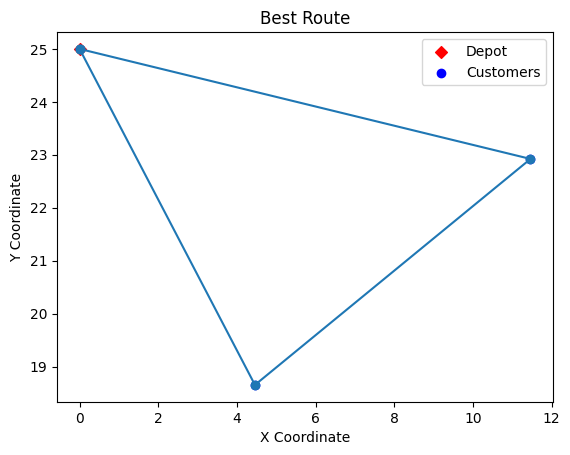

In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

# Fungsi untuk plotting rute terbaik
def plot_best_route(best_chromosome, depot_location, centers):
    route_x = []
    route_y = []

    for point in best_chromosome:
        x, y = centers[point - 1] if point != 0 else depot_location
        route_x.append(x)
        route_y.append(y)

    # Kembali ke depot untuk menutup rute
    route_x.append(depot_location[0])
    route_y.append(depot_location[1])

    # Plot rute
    plt.plot(route_x, route_y, marker='o', linestyle='-')
    plt.scatter(depot_location[0], depot_location[1], color='red', marker='D', label='Depot')
    plt.scatter(centers[:, 0], centers[:, 1], color='blue', label='Customers')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Best Route')
    plt.legend()
    plt.show()

# Plot rute terbaik
plot_best_route(result, depot_location, cluster_centers)
